In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
from plotly.subplots import make_subplots
from datetime import datetime

In [47]:
df = pd.read_csv("Datasets/archive/country_wise_latest.csv")
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [49]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [50]:
vaccine = pd.read_csv('Datasets/archive/day_wise.csv')
vaccine["Date"] = pd.to_datetime(vaccine["Date"], format="%Y-%m-%d")
vaccine["Date"]

0     2020-01-22
1     2020-01-23
2     2020-01-24
3     2020-01-25
4     2020-01-26
         ...    
183   2020-07-23
184   2020-07-24
185   2020-07-25
186   2020-07-26
187   2020-07-27
Name: Date, Length: 188, dtype: datetime64[ns]

In [51]:
df = df.drop(["New cases", "New deaths", "New recovered", "Deaths / 100 Cases", "Recovered / 100 Cases", "Deaths / 100 Recovered", "Confirmed last week", "1 week change", "1 week % increase", "WHO Region"], axis=1)
df.tail()

,Country/Region,Confirmed,Deaths,Recovered,Active
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597
186,Zimbabwe,2704,36,542,2126


In [52]:
# Creating a pivot table
countrywise = pd.pivot_table(df, values=["Confirmed", "Deaths", "Recovered"], index="Country/Region", aggfunc=max)
countrywise

,Confirmed,Deaths,Recovered
Country/Region,,,
Afghanistan,36263,1269,25198
Albania,4880,144,2745
Algeria,27973,1163,18837
Andorra,907,52,803
Angola,950,41,242
...,...,...,...
West Bank and Gaza,10621,78,3752
Western Sahara,10,1,8
Yemen,1691,483,833


In [53]:
countrywise["Recovery Rate"] = countrywise["Recovered"] * 100 / countrywise["Confirmed"]
countrywise["Recovery Rate"]

Country/Region
Afghanistan           69.486805
Albania               56.250000
Algeria               67.339935
Andorra               88.533627
Angola                25.473684
                        ...    
West Bank and Gaza    35.326240
Western Sahara        80.000000
Yemen                 49.260792
Zambia                61.840949
Zimbabwe              20.044379
Name: Recovery Rate, Length: 187, dtype: float64

In [54]:
countrywise["Mortality Rate"] = countrywise["Deaths"] * 100 / countrywise["Confirmed"]
countrywise["Mortality Rate"]

Country/Region
Afghanistan            3.499435
Albania                2.950820
Algeria                4.157581
Andorra                5.733186
Angola                 4.315789
                        ...    
West Bank and Gaza     0.734394
Western Sahara        10.000000
Yemen                 28.562980
Zambia                 3.075571
Zimbabwe               1.331361
Name: Mortality Rate, Length: 187, dtype: float64

In [55]:
countrywise = countrywise.sort_values(by="Confirmed", ascending=False)
countrywise.head()

,Confirmed,Deaths,Recovered,Recovery Rate,Mortality Rate
Country/Region,,,,,
US,4290259,148011,1325804,30.902656,3.449932
Brazil,2442375,87618,1846641,75.608414,3.587410
India,1480073,33408,951166,64.264803,2.257186
Russia,816680,13334,602249,73.743572,1.632708
South Africa,452529,7067,274925,60.753013,1.561668


In [56]:
countrywise.style.background_gradient(cmap="GnBu")

,Confirmed,Deaths,Recovered,Recovery Rate,Mortality Rate
Country/Region,,,,,
US,4290259,148011,1325804,30.902656,3.449932
Brazil,2442375,87618,1846641,75.608414,3.587410
India,1480073,33408,951166,64.264803,2.257186
Russia,816680,13334,602249,73.743572,1.632708
South Africa,452529,7067,274925,60.753013,1.561668
Mexico,395489,44022,303810,76.818824,11.131030
Peru,389717,18418,272547,69.934594,4.725993
Chile,347923,9187,319954,91.961152,2.640527
United Kingdom,301708,45844,1437,0.476288,15.194824


In [57]:
countrywise.sample(5).style.background_gradient(cmap="GnBu")

,Confirmed,Deaths,Recovered,Recovery Rate,Mortality Rate
Country/Region,,,,,
Qatar,109597,165,106328,97.017254,0.150552
Jamaica,853,10,714,83.704572,1.172333
Czechia,15516,373,11428,73.653003,2.403970
Sweden,79395,5700,0,0.000000,7.179293
France,220352,30212,81212,36.855577,13.710790


In [58]:
top_10_active_countries = df.groupby(by="Deaths").max()[["Active", "Country/Region"]].sort_values(by="Active", ascending=False)
top_10_active_countries

,Active,Country/Region
Deaths,,
148011,2816444,US
87618,508116,Brazil
33408,495499,India
45844,254427,United Kingdom
13334,201097,Russia
...,...,...
9,27,Malta
7,19,Taiwan*
3,18,Brunei


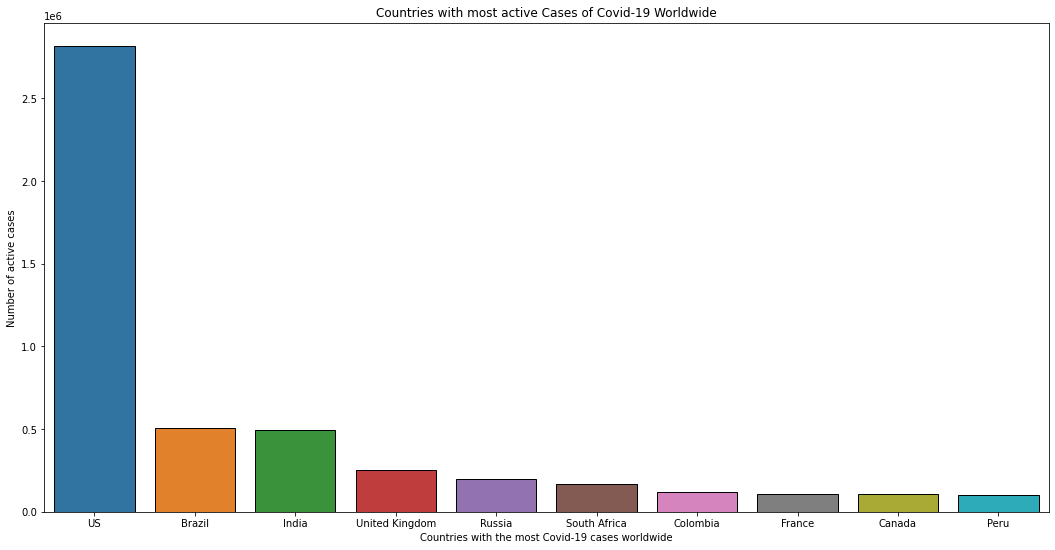

In [59]:
plt.figure(figsize= (18, 9))
plt.title("Countries with most active Cases of Covid-19 Worldwide")
sns.barplot(x="Country/Region", y="Active", data=top_10_active_countries.iloc[:10], linewidth=1, edgecolor = "black")
plt.xlabel("Countries with the most Covid-19 cases worldwide")
plt.ylabel("Number of active cases")
plt.show()

In [60]:
top_10_active_countries = df.groupby(by="Active").max()[["Country/Region", "Deaths"]].sort_values(by="Deaths", ascending=False)
top_10_active_countries

,Country/Region,Deaths
Active,,
2816444,US,148011
508116,Brazil,87618
254427,United Kingdom,45844
47657,Mexico,44022
12581,Italy,35112
...,...,...
51,Papua New Guinea,0
66,Vietnam,0
74,Eritrea,0


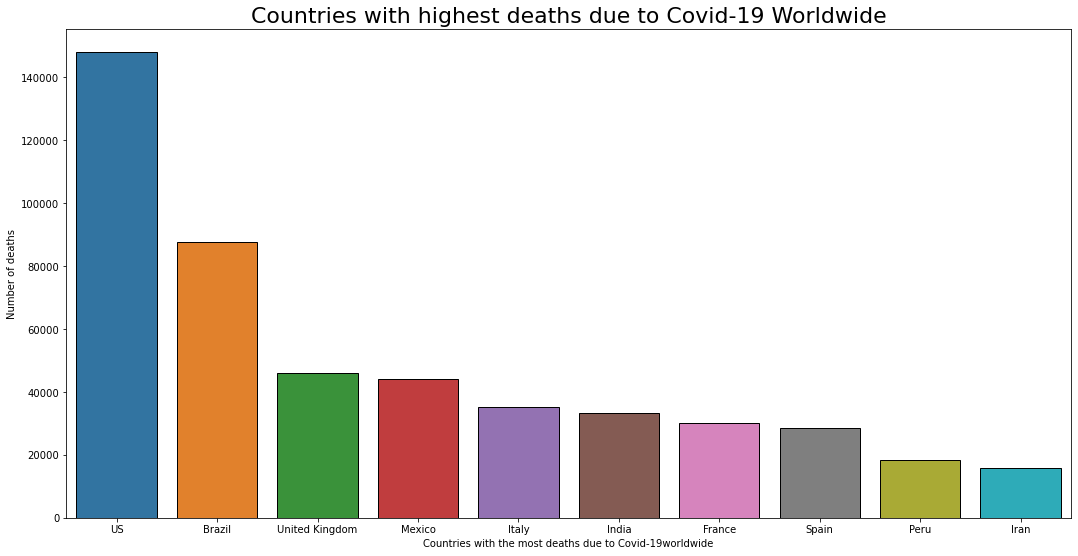

In [61]:
plt.figure(figsize= (18, 9))
plt.title("Countries with highest deaths due to Covid-19 Worldwide", size= 22)
sns.barplot(x="Country/Region", y="Deaths", data=top_10_active_countries.iloc[:10], linewidth=1, edgecolor = "black")
plt.xlabel("Countries with the most deaths due to Covid-19worldwide")
plt.ylabel("Number of deaths")
plt.show()

In [62]:
spotify = pd.read_excel("Datasets/1.xlsx")
spotify.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


<AxesSubplot:xlabel='track_name'>

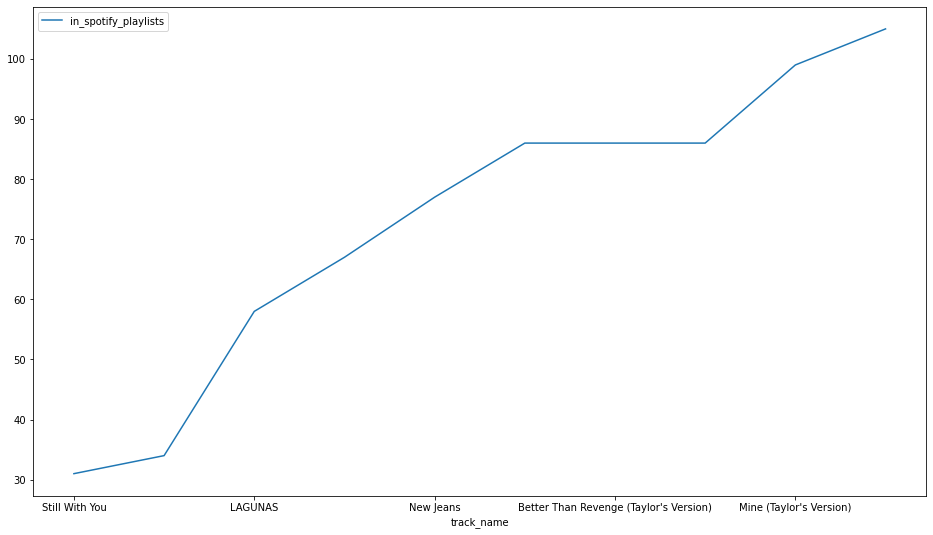

In [63]:
spotify.nsmallest(10, columns="in_spotify_playlists").plot(kind="line", x="track_name", y="in_spotify_playlists", figsize=(16, 9))